In [26]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from scipy.stats.distributions import norm

In [35]:
control = pd.read_csv('../PROCESSED_DATA/control_norm.csv', header = 0, index_col = 0)
rsv = pd.read_csv('../PROCESSED_DATA/rsv_norm.csv', header = 0, index_col = 0)

genes = control.index # List of all gene candidates

# Obtain mean gene mRNA signal for controls and RSV group
con_mean = control.mean(axis = 1)
rsv_mean = rsv.mean(axis = 1)

# Obtain variance of gene mRNA signal for controls and RSVP group
con_var = control.var(axis = 1)
rsv_var = rsv.var(axis = 1)

# Obtain sample size for controls and RSVP group
con_n = len(control.columns)
rsv_n = len(rsv.columns)

# Compute Z-scores and p-values
Z = (con_mean - rsv_mean) / np.sqrt(con_var / con_n + rsv_var / rsv_n)
p_values = 2 * norm.sf(abs(Z))


###### TRY BENJAMINI - HOCHBERG ADJUSTMENT ################################

b_hoch = multipletests(p_values, alpha = 0.05, method = 'fdr_bh')
rejects = b_hoch[0]
adjusted_p_vals = b_hoch[1]
print(rejects)

bhoch_genes = pd.DataFrame({"Gene": genes, "Initial p-val": p_values, "Adjusted p-values": adjusted_p_vals,
                                "Reject?": rejects})

bhoch_sig_genes = bhoch_genes[bhoch_genes["Reject?"] == True]

print("The number of significant genes is: ", bhoch_sig_genes.shape[0])
bhoch_sig_genes.head(20)


###########################################################################


[False False False ... False False False]
The number of significant genes is:  220


,Gene,Initial p-val,Adjusted p-values,Reject?
26,SOD2,0.000355,0.032955,True
106,NCF2,0.000483,0.034630,True
126,JAML,0.001043,0.049764,True
165,FPR1,0.000122,0.021402,True
168,RNF149,0.000483,0.034630,True
189,LITAF,0.000288,0.031242,True
259,TMEM154,0.000003,0.004463,True
310,ATP6V1B2,0.000146,0.022184,True
329,CYTH4,0.000001,0.002293,True
700,IGSF6,0.000134,0.021637,True


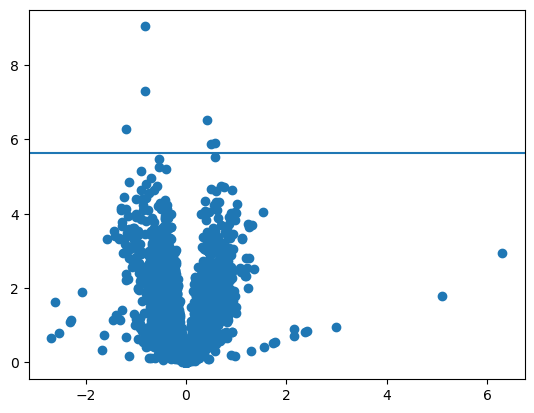

4.574873352131344
TMEM154      4.666702
CYTH4        4.844408
TNFRSF10B    5.119277
LAMTOR4      4.838055
DHX33       -4.644892
CDCA7       -5.012837
ERCC6L      -6.121963
MTHFD1L     -5.446294
dtype: float64
Index(['TMEM154', 'CYTH4', 'TNFRSF10B', 'LAMTOR4', 'DHX33', 'CDCA7', 'ERCC6L',
       'MTHFD1L'],
      dtype='object')


In [36]:
##### BONFERRI CORRECTION + VOLCANO PLOT ###########

log10_p = -np.log10(p_values)
log2_FC = con_mean - rsv_mean

Z_th = -norm.ppf(0.025 / Z.shape[0])
p_th = norm.sf(abs(Z_th))

sig_Z = Z[Z.abs() > Z_th]
sig_p = p_values[p_values < p_th]
sig_genes = sig_Z.index

plt.scatter(log2_FC, log10_p, marker = 'o')
plt.axhline(y = -np.log10(p_th))
plt.show()

print(Z_th)
print(sig_Z)
#print(sig_p)
print(sig_genes)